In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
import keras
import os
import glob
import skimage
from skimage import io
import random
import cv2

In [4]:
import os 
dataset_pth = 'Nature.jpg' 


In [5]:
# accessing an image file from the dataset classes 
image = io.imread('Nature.jpg') 


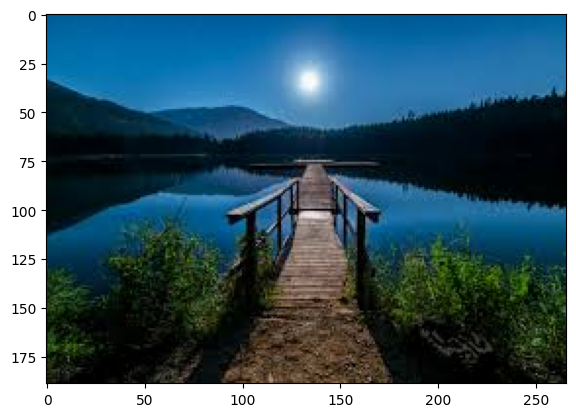

In [6]:
i, (im1) = plt.subplots(1) 
i.set_figwidth(15) 
im1.imshow(image) 


Text(0.5, 0.98, 'Original & RGB image channels')

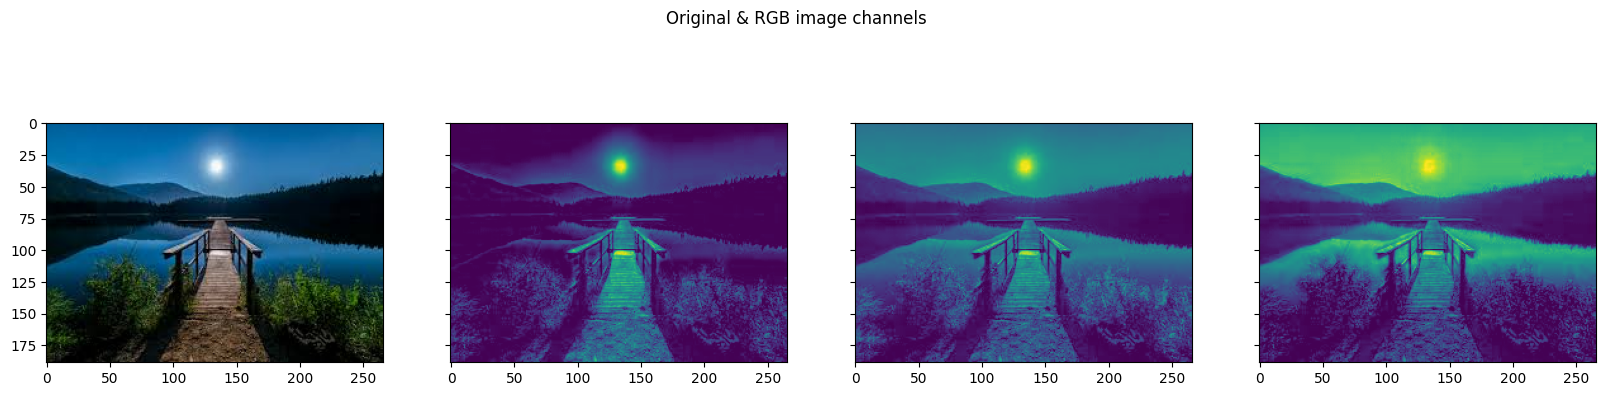

In [8]:
i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True) 
i.set_figwidth(20) 
im1.imshow(image) #Original image 
im2.imshow(image[:, : , 0]) #Red 
im3.imshow(image[:, : , 1]) #Green 
im4.imshow(image[:, : , 2]) #Blue 
i.suptitle('Original & RGB image channels')



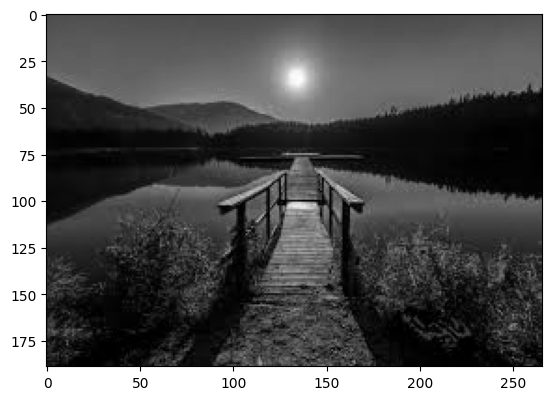

In [9]:
gray_image = skimage.color.rgb2gray(image) 
plt.imshow(gray_image, cmap = 'gray') 


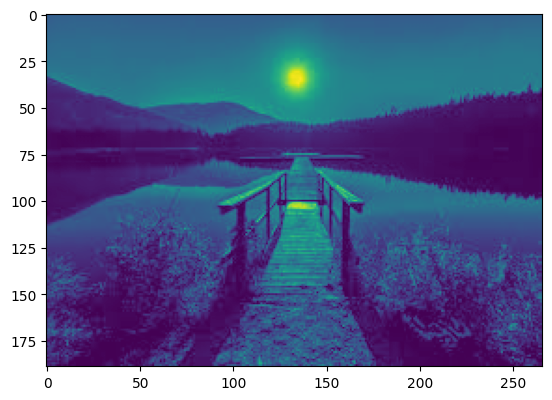

In [10]:
norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image)) 
plt.imshow(norm_image) 


In [11]:
%pip install keras_preprocessing 

   ---------------------------------------- 0.0/42.6 kB ? eta -:--:--
   ---------------------------------------- 42.6/42.6 kB 1.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\Hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [12]:
from numpy import expand_dims 
from keras_preprocessing.image import load_img 
from keras_preprocessing.image import img_to_array 
from keras_preprocessing.image import ImageDataGenerator 


In [13]:
data = img_to_array(image) 

In [14]:
samples = expand_dims(image, 0) 

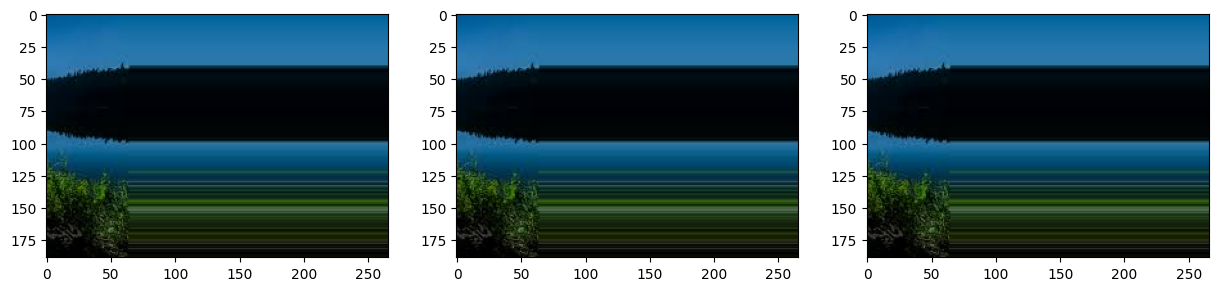

In [17]:
datagen = ImageDataGenerator(width_shift_range=[-200,200])
it = datagen.flow(samples, batch_size=1) 
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15)) 
for i in range(3): 
# convert to unsigned integers 
  images = next(it)[0].astype('uint8') 
# plot image 
  im[i].imshow(images) 


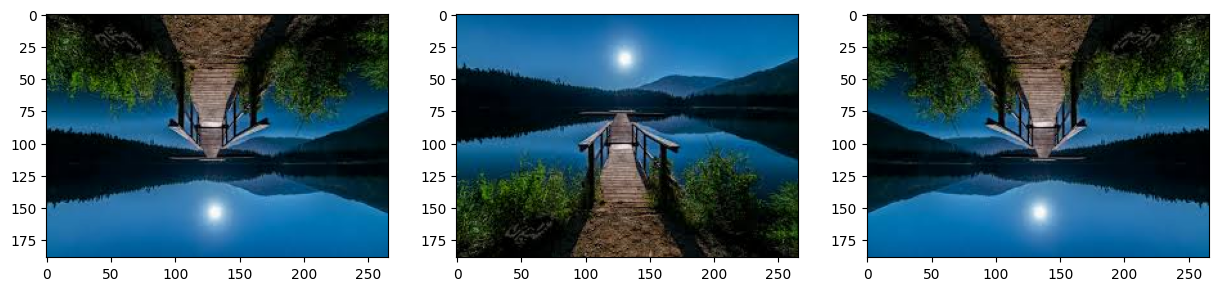

In [18]:
# ImageDataGenerator for flipping 
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True) 
# create an iterator 
it = datagen.flow(samples, batch_size=1) 
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15)) 
# generate batch of images 
for i in range(3): 
# convert to unsigned integers 
  images = next(it)[0].astype('uint8') 
# plot image 
  im[i].imshow(images) 


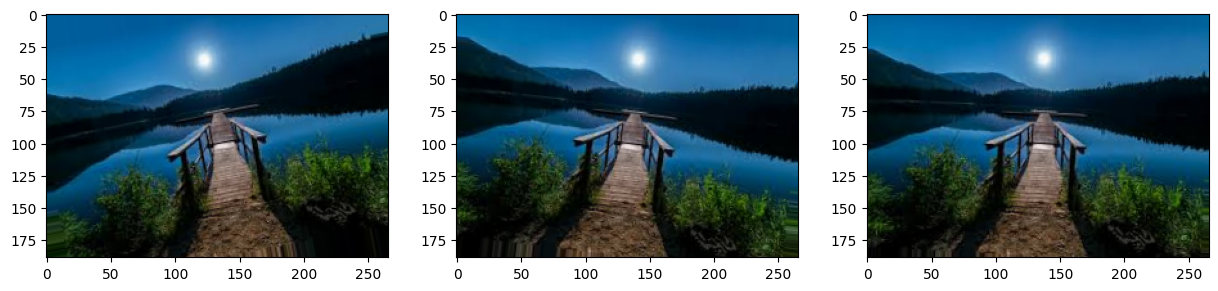

In [19]:
# ImageDataGenerator for rotation 
datagen = ImageDataGenerator(rotation_range=20, fill_mode='nearest') 
# create an iterator 
it = datagen.flow(samples, batch_size=1) 
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15)) 
# generate batch of images 
for i in range(3): 
# convert to unsigned integers 
  images = next(it)[0].astype('uint8') 
# plot image 
  im[i].imshow(images) 


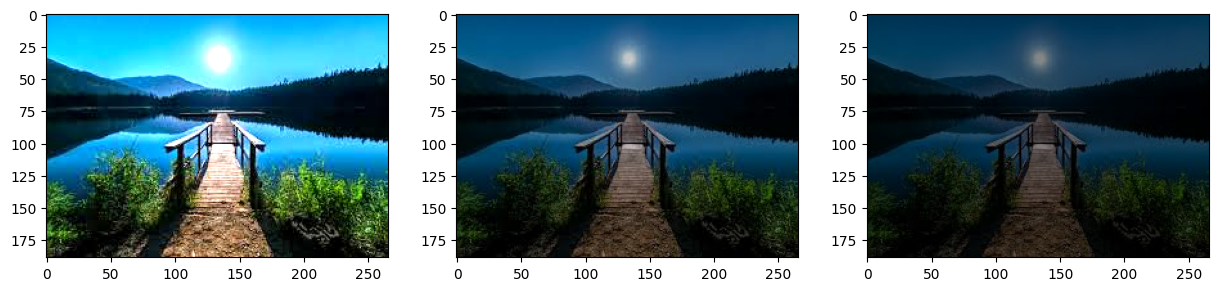

In [20]:
# ImageDataGenerator for brightness 
datagen = ImageDataGenerator(brightness_range=[0.5,2.0]) 
# create an iterator 
it = datagen.flow(samples, batch_size=1) 
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
# generate batch of images 
for i in range(3): 
# convert to unsigned integers 
  images = next(it)[0].astype('uint8') 
# plot image 
  im[i].imshow(images) 


C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


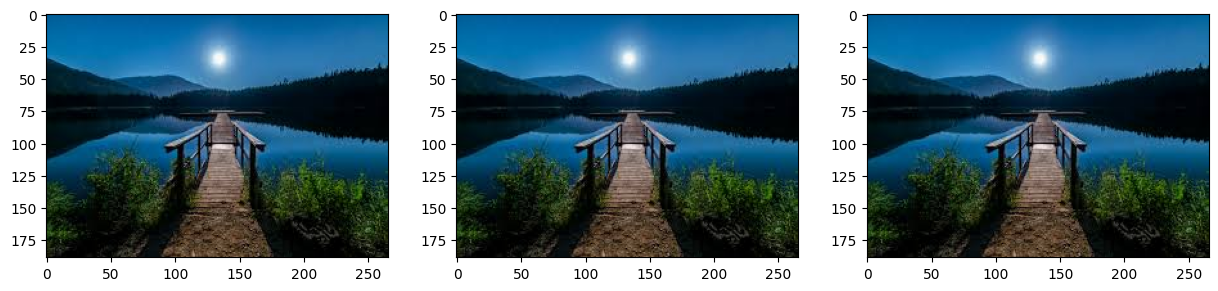

In [21]:
# creating the image data generator to standardize images 
datagen = ImageDataGenerator(featurewise_center =True, 
featurewise_std_normalization = True) 
# create an iterator 
it = datagen.flow(samples, batch_size=1) 
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15)) 
# generate batch of images 
for i in range(3): 
# convert to unsigned integers 
  images = next(it)[0].astype('uint8') 
# plot image 
  im[i].imshow(images) 
